In [ ]:
# The code below produces a plot of the Laguerre Poisson flow as described in the paper:
# "Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
# The program reads the file with pre-computed coefficients and produces an implicit plot, 
# i.e. it visualises the flow of the real roots when r varies. 
# Version 1.0, June 1, 2024. 

In [176]:
#Laguerre coefficients precomputation for a < -1
DRF=RealBallField(1500)
CCF=ComplexBallField(1500)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def integrand(n,y,a):
    term1=CCF(I*y)/CCF(1+I*y)
    term2=CCF(1)/CCF(1+I*y)
    integr=term1.pow(n)*term2.pow(a+1)*Phi(y.abs(),60)
    return integr

def ln(n,a,M):
    res= CCF.integral(lambda y, _: integrand(n,y,a), -M, M)
    return real_part(res)

def genlcoeffs(a,N,M):
    f = open("Laguerrecoeffam8", "w")
    for n in range(N):
        f.write(str(ln(n,a,M).mid()));f.write("\r\n")
    f.close() 
    return 0

genlcoeffs(-8,300,100)

KeyboardInterrupt: 

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 52.815231 versus formula: 52.792713 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


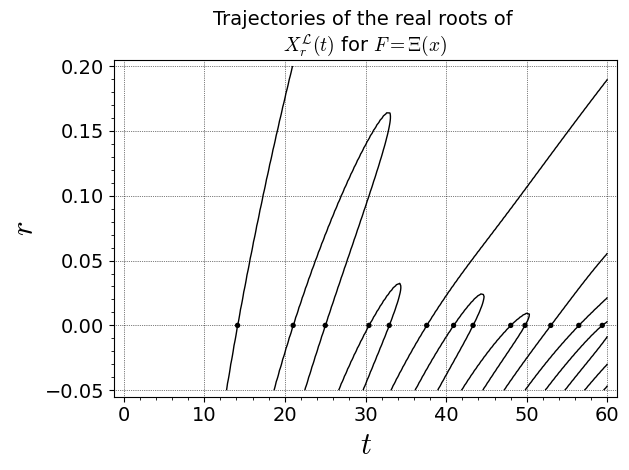

In [196]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("Laguerrecoeffa12", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("0.5"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -2*ordrho[k-1]*sumzeros(k) - (0.5 + 1 - ordrho[k-1])

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xi(60)))
a1n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,-0.05,0.2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$',gridlines=True,plot_points=150)
show(a1n+z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 45.315231 versus formula: 45.292713 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


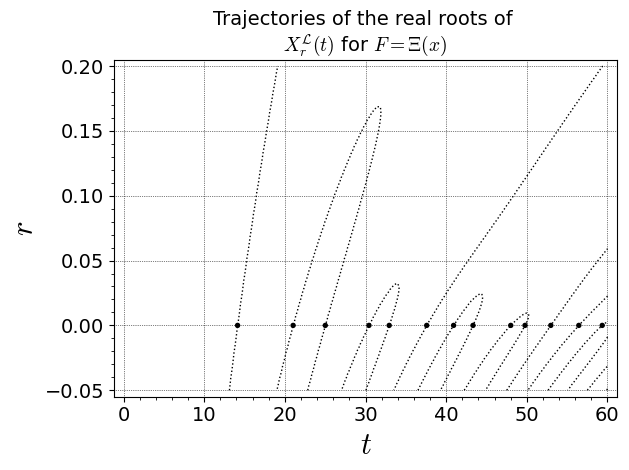

In [189]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("Laguerrecoeffa8", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("8"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -2*ordrho[k-1]*sumzeros(k) - (8 + 1 - ordrho[k-1])

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xi(60)))
a2n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,-0.05,0.2),color='black',fontsize=14,linestyle =":",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$',gridlines=True,plot_points=150)
show(a2n+z,aspect_ratio='automatic')

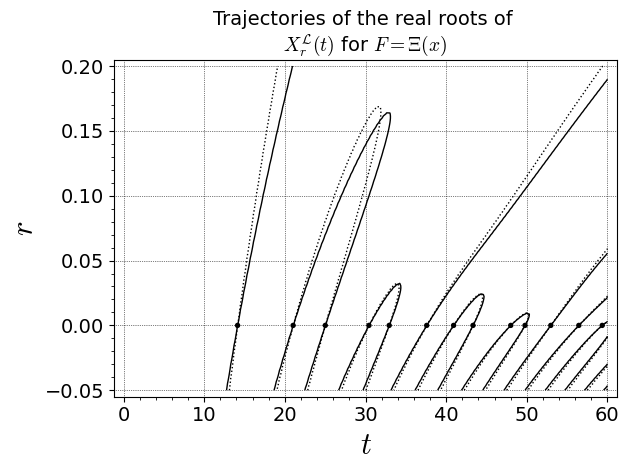

In [199]:
show(a1n+a2n+z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 1.0000000000000000 = Xin(0) = 1.0000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : 19.349556 versus formula: 19.349556 (should be equal).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


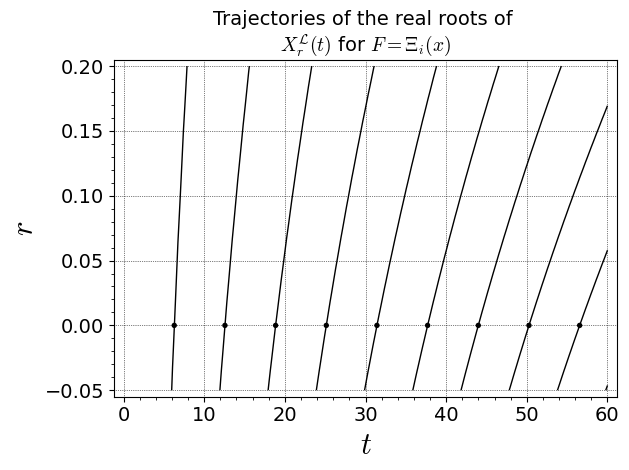

In [197]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("Laguerrecoeffa12int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    hyp=CCF(t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(CCF(t), CCF("0.5"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 2-(0.5+1-2*k*pi())

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xin(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xin(60)))

a1i=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,-0.05,0.2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi_i(x)$',gridlines=True,plot_points=90)
show(a1i + z1,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 1.0000000000000000 = Xin(0) = 1.0000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : 11.849556 versus formula: 11.849556 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


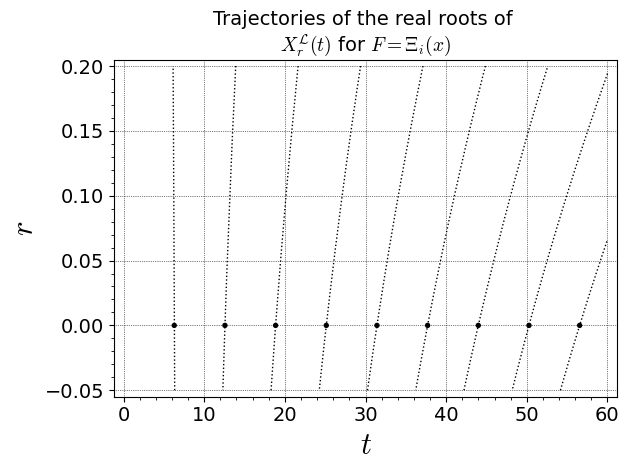

In [191]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("Laguerrecoeffa8int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    hyp=CCF(t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(CCF(t), CCF("8"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 2-(8+1-2*k*pi())

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xin(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xin(60)))

a2i=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,-0.05,0.2),color='black',fontsize=14,linestyle =":",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi_i(x)$',gridlines=True,plot_points=90)
show(a2i + z1,aspect_ratio='automatic')

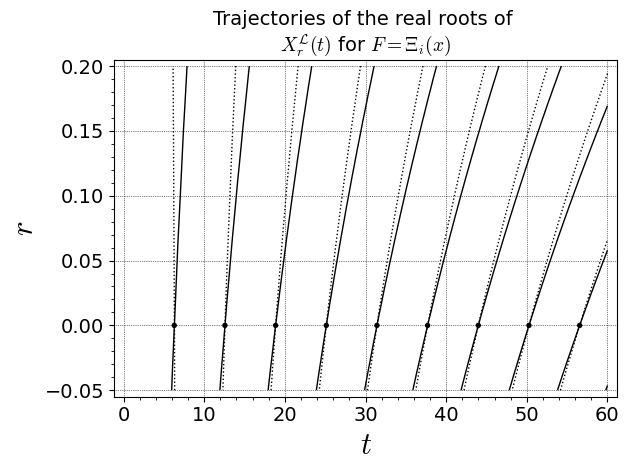

In [198]:
show(a1i+a2i+z1,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 25.536711 versus formula: 25.536267 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000389071 (should show 20 zeros).


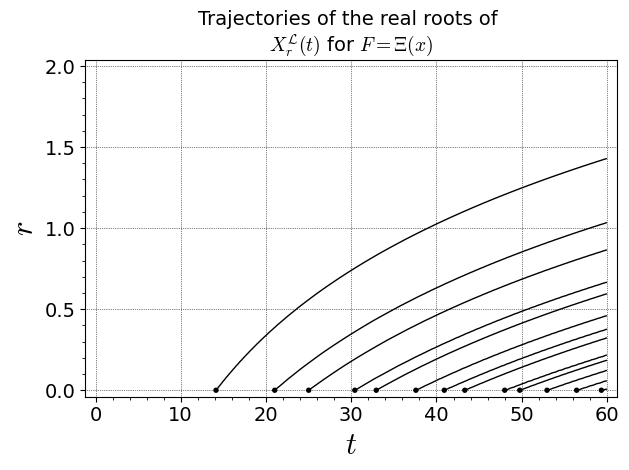

In [697]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa1", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("1"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (1 + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(100,0)-Xi(100)))
a1n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$',gridlines=True,plot_points=150)
show(a1n+z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 25.596685 versus formula: 25.596240 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


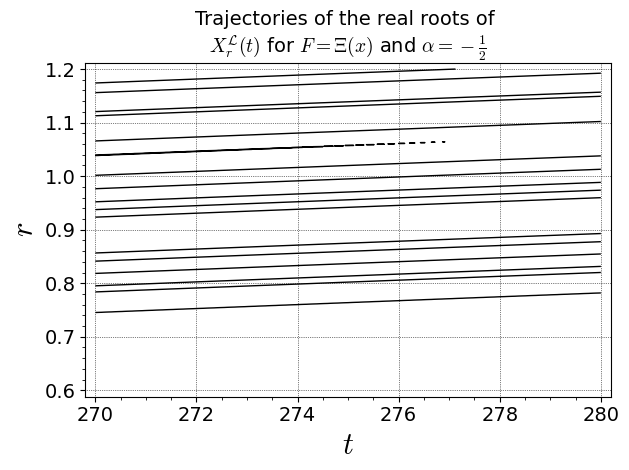

In [342]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffam12", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("-0.5"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,300001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(300000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (-1/2 + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xi(60)))
a1n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,270,280),(r,0.6,1.2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$ and $\alpha=-\frac{1}{2}$',gridlines=True,plot_points=800)
show(a1n,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 25.256219 versus formula: 25.256483 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


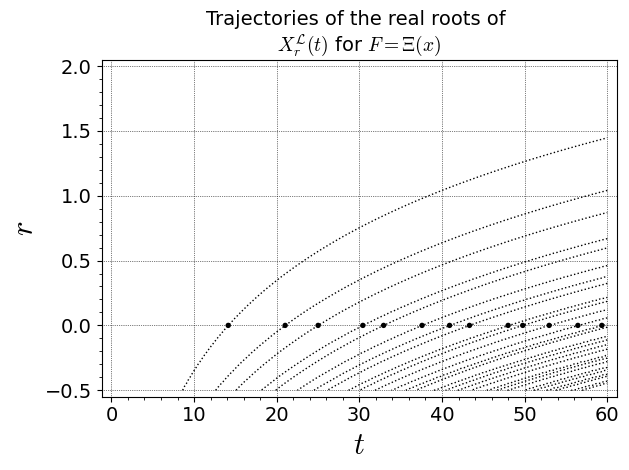

In [346]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa8", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("8"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*1000,tr) - LaguerreFlow(x0,tr))/(tr*1000)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,400001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(400000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (8 + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xi(60)))
a8n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,-0.5,2),color='black',fontsize=14,linestyle =":",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$',gridlines=True,plot_points=150)
show(a8n+z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 24.936358 versus formula: 24.936622 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


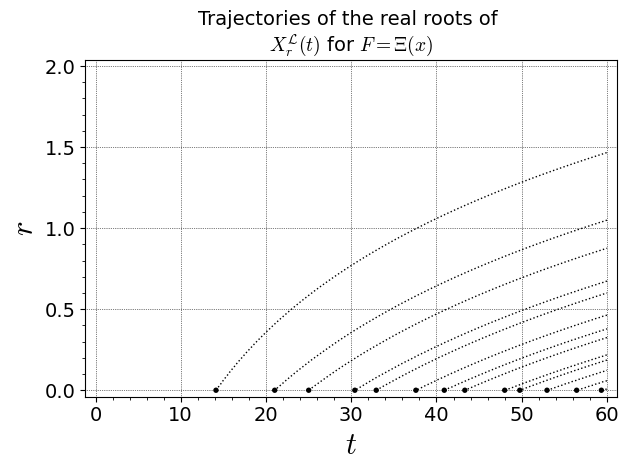

In [698]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa16", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("16"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*1000,tr) - LaguerreFlow(x0,tr))/(tr*1000)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,400001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(400000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (16 + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xi(60)))
a16n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,0,2),color='black',fontsize=14,linestyle =":",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$',gridlines=True,plot_points=150)
show(a16n+z,aspect_ratio='automatic')

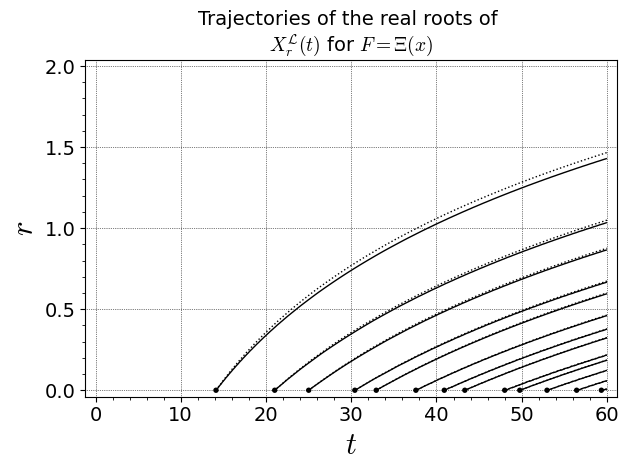

In [699]:
show(a1n+a16n+z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : -0.000586 versus formula: 0.000054 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


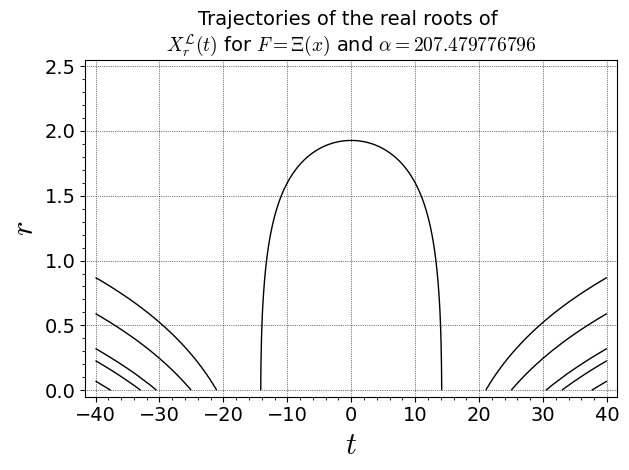

In [714]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1524)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa207", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1524)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("207.47977679659714232"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*1000,tr) - LaguerreFlow(x0,tr))/(tr*1000)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,400001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(400000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (207.47977679659714232 + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(1),verifyPDE(1)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xi(60)))
a207n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,-40,40),(r,0,2.5),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$ and $\alpha=207.479776796$',gridlines=True,plot_points=180)
show(a207n,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : -17.674079 versus formula: -17.673439 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


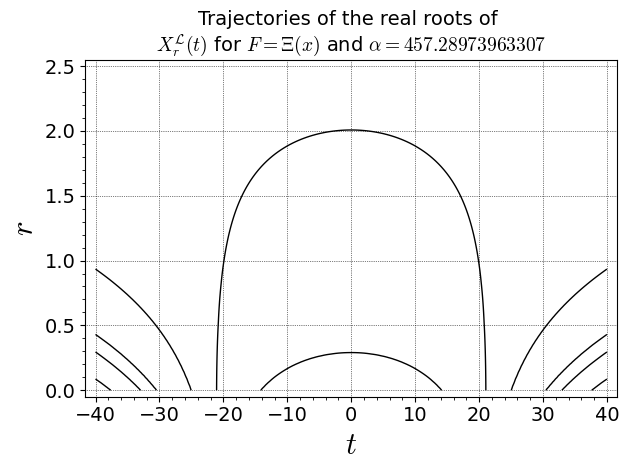

In [715]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1524)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa457", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1524)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("457.28973963307063695"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*1000,tr) - LaguerreFlow(x0,tr))/(tr*1000)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,400001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(400000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (457.28973963307063695 + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(1),verifyPDE(1)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xi(60)))
a207n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,-40,40),(r,0,2.5),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$ and $\alpha=457.28973963307$',gridlines=True,plot_points=180)
show(a207n,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 0.000498 versus formula: -0.000000 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


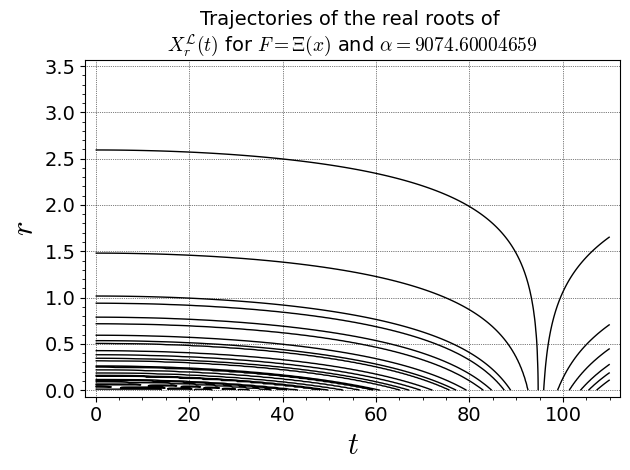

In [702]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1524)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa9074", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1524)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(190):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("9074.6000465965965587"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*1000,tr) - LaguerreFlow(x0,tr))/(tr*1000)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,400001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(400000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (9074.6000465965965587 + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(27),verifyPDE(27)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(100,0)-Xi(100)))
a9074n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,110),(r,0,3.5),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$ and $\alpha=9074.60004659$',gridlines=True,plot_points=300)
show(a9074n,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.4971207781883141 = Xi(0) = 0.4971207781883141 (should be equal).
d/dr z_1(0) via Newton approximation : 0.003225 versus formula: 0.000000 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).
-0.06859503966506963


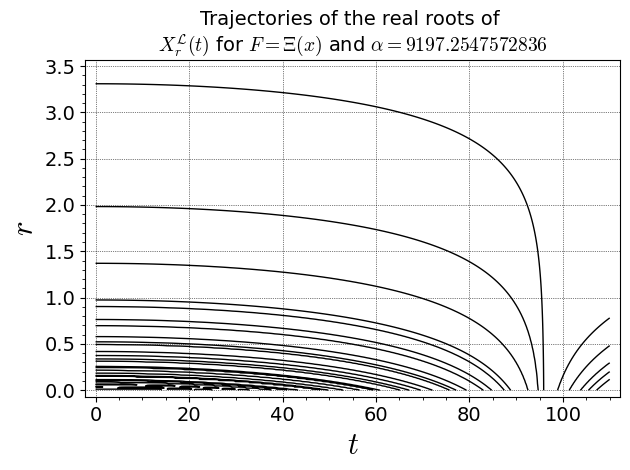

In [703]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1524)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa9197", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1524)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("9197.2547572836030293"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*1000,tr) - LaguerreFlow(x0,tr))/(tr*1000)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,400001):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(400000):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (9197.2547572836030293 + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(28),verifyPDE(28)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(100,0)-Xi(100)))
print(sumzeros(28))
a9197n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,110),(r,0,3.5),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$ and $\alpha=9197.2547572836$',gridlines=True,plot_points=300)
show(a9197n,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 1.0000000000000000 = Xin(0) = 1.0000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : 18.823030 versus formula: 18.823030 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


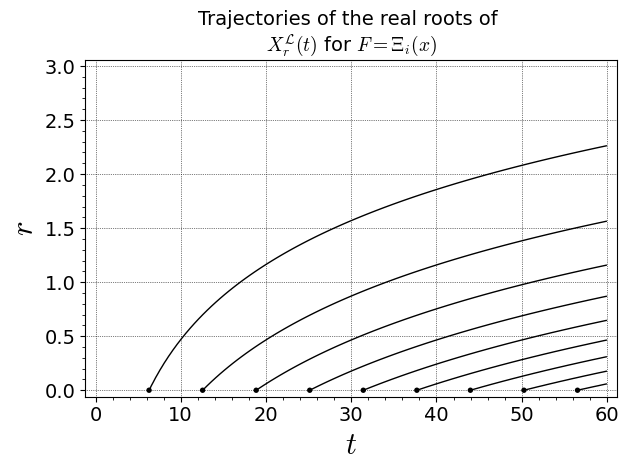

In [704]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa1int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(CCF(t), CCF("1"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(1+1/2)/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xin(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xin(60)))

a2i=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,0,3),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi_i(x)$',gridlines=True,plot_points=120)
show(a2i + z1,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 1.0000000000000000 = Xin(0) = 1.0000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : 18.027255 versus formula: 18.027255 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


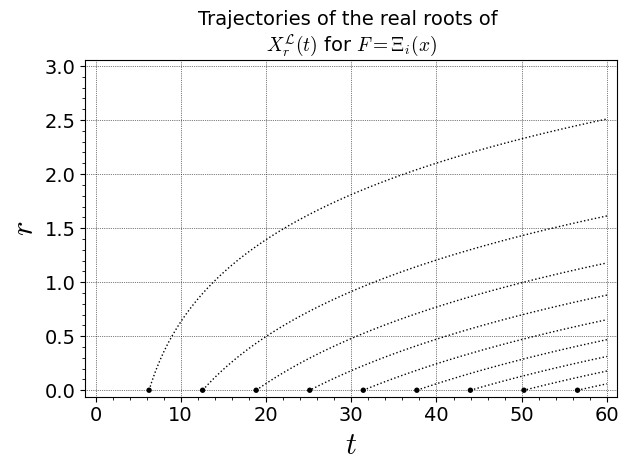

In [705]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa16int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(CCF(t), CCF("16"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(16+1/2)/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xin(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xin(60)))

a16i=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,60),(r,0,3),color='black',fontsize=14,linestyle =":",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi_i(x)$',gridlines=True,plot_points=120)
show(a16i + z1,aspect_ratio='automatic')

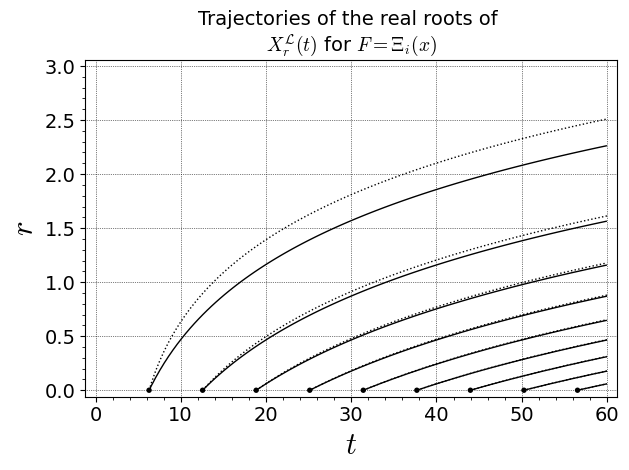

In [706]:
show(a2i+a16i+z1,aspect_ratio='automatic')

In [200]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa39int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(CCF(t), CCF("8"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(8+1/2)/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xin(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),verifyPDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xin(60)))

#a8i=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,300),(r,0,0.2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi_i(x)$',gridlines=True,plot_points=180)
#show(a8i,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 1.0000000000000000 = Xin(0) = 1.0000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : 18.451669 versus formula: 18.451669 (should be equal).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


Automated checks:
The sum of all the coefficients is   : 1.0000000000000000 = Xin(0) = 1.0000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : -0.000000 versus formula: -0.000000 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


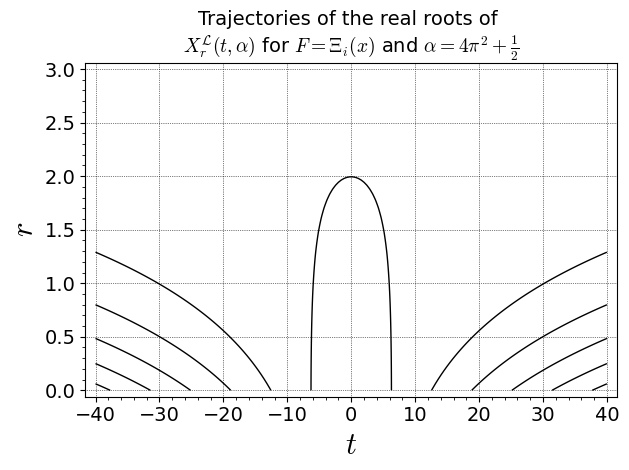

In [711]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa39int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(CCF(t), CCF("39.97841762"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(39.97841762+1/2)/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xin(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(1),verifyPDE(1)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xin(60)))

a8i=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,-40,40),(r,0,3),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t,\alpha)$ for $F=\Xi_i(x)$ and $\alpha=4\pi^2+\frac{1}{2}$',gridlines=True,plot_points=180)
show(a8i,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 1.0000000000000000 = Xin(0) = 1.0000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : -0.000000 versus formula: -0.000000 (should be equal).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


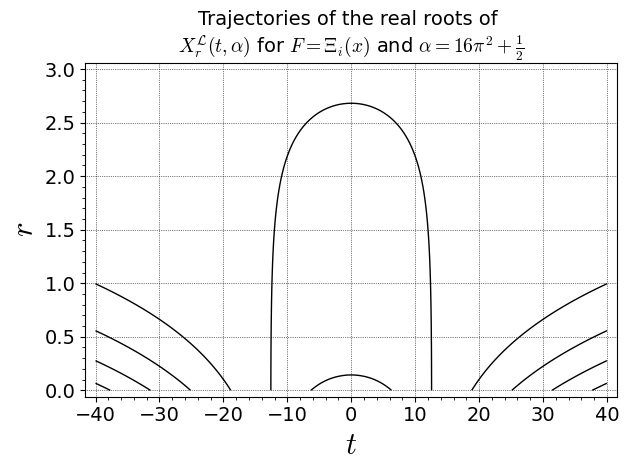

In [712]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa158int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(CCF(t), CCF("158.4136705"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000000001");x0 = 2*k*RDF.pi();
    while(y):
        hd = (LaguerreFlow(x0 + tr*100,tr) - LaguerreFlow(x0,tr))/(tr*100)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - 2*k*RDF.pi())/(tr) 
    return dzdr3

#compute d/dr zk via formula
def verifyPDE(k):
    return 1/(2*k*pi())-(158.4136705+1/2)/(2*k*pi())+2*k*pi()

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xin(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(2),verifyPDE(2)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(60,0)-Xin(60)))

a8i=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,-40,40),(r,0,3),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t,\alpha)$ for $F=\Xi_i(x)$ and $\alpha=16\pi^2+\frac{1}{2}$',gridlines=True,plot_points=180)
show(a8i,aspect_ratio='automatic')

In [550]:
%%gp
xi(s)= s/2*(s-1)*Pi^(-s/2)*gamma(s/2)*zeta(s)
tes(a,r)= 2/gamma(a+1)*intnum(v=0,180, xi(1/2+v*sqrt(1-(exp(-r))^2)*I)*v^(2*a+1)*exp(-v^2),4)
\\print(tes(457.28973963307,2.007))
print(tes(207.4831879,1.925))
print(tes(207.4831879,2))

(s)->s/2*(s-1)*Pi^(-s/2)*gamma(s/2)*zeta(s)
(a,r)->2/gamma(a+1)*intnum(v=0,180,xi(1/2+v*sqrt(1-(exp(-r))^2)*I)*v^(2*a+1)*exp(-v^2),4)

2.9383198742902543342519071104663363087 E-7 + 3.4273994285750315061707933853875963777 E-42*I
-2.6790587194348498238559328919196831478 E-5 + 4.3747257853278463475490567120362904119 E-42*I


In [696]:
%%gp
default(realprecision, 50)
xi(s)= 2/s*sin(s/2)
tes(a,r)= 2/gamma(a+1)*intnum(v=0,990, xi(v*sqrt(1-(exp(-r))^2))*v^(2*a+1)*exp(-v^2),10)
solve(X = 1.9, 2.1, tes(4*Pi^2+1/2,X))
\\print("\n")
\\solve(X = 0.1, 0.3, tes(16*Pi^2+1/2,X))
\\solve(X = 2, 3, tes(16*Pi^2+1/2,X))
\\print("\n")
\\solve(X = 0.001, 0.28, tes(36*Pi^2+1/2,X))
\\solve(X = 0.1, 0.3, tes(36*Pi^2+1/2,X))
\\solve(X = 2, 4, tes(36*Pi^2+1/2,X))
\\solve(X = 2, 4, tes(64*Pi^2+1/2,X))
\\solve(X = 2, 4, tes(100*Pi^2+1/2,X))
\\solve(X = 2, 4, tes(144*Pi^2+1/2,X))
prev=1
for(d=87,90,sol=solve(X = 1.9, 12, tes((2*d)^2*Pi^2+1/2,X));print(d," ",sol," ",sol/prev);prev=sol)


(s)->2/s*sin(s/2)
(a,r)->2/gamma(a+1)*intnum(v=0,990,xi(v*sqrt(1-(exp(-r))^2))*v^(2*a+1)*exp(-v^2),10)
1.9939722453613672784455031275523216101428237816631










1
87 6.4511117232897906543783455058232232258654084787218 6.4511117232897906543783455058232232258654084787218
88 6.4625403927336821738819238312498492120626846793672 1.0017715813853652169611679260200039525417725478345
  ***   at top-level: ...87,90,sol=solve(X=1.9,12,tes((2*d)^2*Pi^2+1/2,
  ***                                             ^---------------------
  ***   domain error in solve: f(a)f(b) > 0


In [665]:
print(2.68055438465887164021219907404/1.99397224536136727844550312755)
print(3.08479564316551918246928307256/2.68055438465887164021219907404)
print(3.37204876561503629841967238971/3.08479564316551918246928307256)
print(3.59499369161051003153299642017/3.37204876561503629841967238971)
print(3.77721007813063343233058398794/3.59499369161051003153299642017)

1.3443288345134789917540943586
1.1508050949535543323610774502
1.0931190119792658606316742178
1.0661155699374383922087481884
1.0506861491705407830906801316


In [538]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("zeros10mln.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1524)
global m1; m1 = []; CoeffSum = RDF(0)
with open("LaguerreNewcoeffa9197", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1524)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    hyp=CCF(t*t).hypergeometric([-n],[a + 1])
    return hyp

def LaguerreFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-2*r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t, CCF("9197.2547572836030293"),n) #enter parm value here!
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.000000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (LaguerreFlow(x0 + tr*1000,tr) - LaguerreFlow(x0,tr))/(tr*1000)
        h = LaguerreFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

#sum zeros around k-th zero
def sumzeros(k):
    zk =ordrho[k-1]
    sum0 = 0
    for j in range(k-1):
        sum0 = sum0 + 1/(zk-ordrho[j])
    sum1 = 0
    for j in range(k+1,10000001-1):
        sum1 = sum1 + 1/(zk-ordrho[j-1])
    sum2 = 0
    for j in range(10000000-1):
        sum2 = sum2 + 1/(zk+ordrho[j])
    return sum0 + sum1 + sum2

#compute d/dr zk via formula
def verifyPDE(k):
    return -1*sumzeros(k) - (9197.2547572836030293 + 1/2)/ordrho[k-1] + ordrho[k-1]

print("Automated checks:")
#print("The sum of all the coefficients is   : %3.16f = Xi(0) = %3.16f (should be equal)." % (CoeffSum, LaguerreFlow(0,0)))
#print("d/dr z_1(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(28),verifyPDE(28)))
#print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(LaguerreFlow(100,0)-Xi(100)))
print(sumzeros(1))
#a9197n=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,110),(r,-0.5,3.5),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{L}}_r(t)$ for $F=\Xi(x)$ and $\alpha=9197.2547572836$',gridlines=True,plot_points=300)
#show(a9197n,aspect_ratio='automatic')

Automated checks:
-0.5796174327208075


In [ ]:
-0.06960272986319715
-0.06919176078639389
-0.06910149800091148
-0.06882501756138204